# Übungsblatt 6

Lernziele:
- Klassifikation mit Multi Layer Perzeptron



Eine Laderoutine für die MNIST Ziffern Stichprobe:

In [1]:
import os
import struct
import numpy as np
import gzip
 
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte.gz' % kind)
        
    with gzip.open(labels_path, 'rb') as lbpath:
        lbpath.read(8)
        buffer = lbpath.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        imgpath.read(16)
        buffer = imgpath.read()
        images = np.frombuffer(buffer, 
                               dtype=np.uint8).reshape(
            len(labels), 784).astype(np.float64)
 
    return images, labels

Lade Trainingsdaten (Daten sollten unter ./mnist gespeichert sein!)

In [2]:
X_train,y_train=load_mnist("mnist")
X_test,y_test=load_mnist("mnist","t10k")
X_train = X_train / 255
X_test = X_test / 255

Zeige das erste Exemplar jeder Klasse

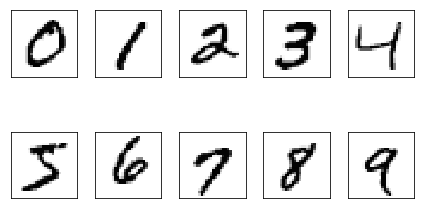

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

Schritt 1: Trainieren Sie ein MLP mit den Ziffern der MNIST Stichprobe

In [6]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))


Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05529723
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Iteration 11, loss = 0.04081494
Iteration 12, loss = 0.03828222
Iteration 13, loss = 0.03557957
Iteration 14, loss = 0.03054891
Iteration 15, loss = 0.02924761
Iteration 16, loss = 0.02610471
Iteration 17, loss = 0.02363894
Iteration 18, loss = 0.02208186
Iteration 19, loss = 0.01932900
Iteration 20, loss = 0.01830387
Iteration 21, loss = 0.01639227
Iteration 22, loss = 0.01392950
Iteration 23, loss = 0.01270193
Iteration 24, loss = 0.01234102
Iteration 25, loss = 0.01081313
Iteration 26, loss = 0.01028644
Iteration 27, loss = 0.00896707
Iteration 28, loss = 0.00744908
Iteration 29, loss = 0.00707946
Iteration 30, loss = 0.00573869
Iteration 31, loss = 0.00499554
Iteration 32, los

Schritt 2: Testen Sie das Neuronale Netz mit Hilfe der MNIST Teststichprobe und geben Sie die Verwechslungsmatrix an!

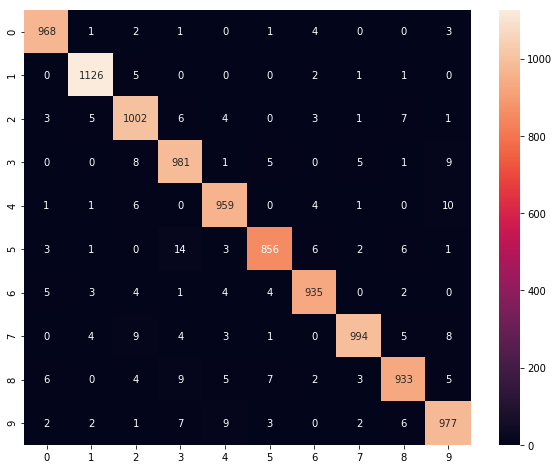

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y_pred_test = mlp.predict(X_test)
result = confusion_matrix(y_test,y_pred_test) # Returns a ndarray
cm_df = pd.DataFrame(
    result, 
)

plt.figure(figsize = (10,8)) # sets plot size
sns.heatmap(cm_df, annot=True,fmt='d') # creates heat map
plt.show() # shows figure